In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
# @Author: Mingyeong Yang (mmingyeong@kasi.re.kr)
# @Date: 2024-05-22
# @Filename: 240522_PointInfo.ipynb

import matplotlib.pyplot as plt
import shutil
import numpy as np
import glob

import pandas as pd
import h5py


In [2]:
seondeok_snapshot_file_path = glob.glob(f"/home/users/mmingyeong/tng/tng_99_240425/tng_local/snapshot-99.*.hdf5")
# seondeok_snapshot_file_path

In [3]:
len_dt = len(seondeok_snapshot_file_path)
ID_df = []; len_df = []
x_min = []; x_max = []
y_min = []; y_max = []
z_min = []; z_max = []

In [4]:
OSError_dir = "/home/users/mmingyeong/tng/tng_99_240425/tng_local/OSError"
for num in range(0, 600):
    print(num)
    ID_df.append(num)
    
    file = f"/home/users/mmingyeong/tng/tng_99_240425/tng_local/snapshot-99.{num}.hdf5"
    try:
        f = h5py.File(file, 'r')
    except OSError:
        shutil.move(file, OSError_dir)
        print(f"file {num} has OSError")
        pass
            
    PartType1 = f['PartType1']
    dm_pos = PartType1["Coordinates"][:]
    dm_pos = dm_pos*0.001 # kpc -> Mpc 단위 변경
    dm_pos = dm_pos.astype(np.float64) # 데이터 타입 변경
    
    len_df.append(len(dm_pos))
    x = dm_pos[:, 0]
    x_min.append(min(x))
    x_max.append(max(x))
    
    y = dm_pos[:, 1]
    y_min.append(min(y))
    y_max.append(max(y))
    
    z = dm_pos[:, 2]    
    z_min.append(min(z))
    z_max.append(max(z))


OSError: Unable to open file (truncated file: eof = 549054921, sblock->base_addr = 0, stored_eof = 624934648)

In [ ]:
dm_df = pd.DataFrame({"ID":ID_df, "x_min [cMpc/h]":x_min, "x_max [cMpc/h]":x_max, "y_min [cMpc/h]":y_min, "y_max [cMpc/h]":y_max, "z_min [cMpc/h]":z_min, "z_max [cMpc/h]":z_max, "len": len_df})
# dm_df

,ID,x_min [cMpc/h],x_max [cMpc/h],y_min [cMpc/h],y_max [cMpc/h],z_min [cMpc/h],z_max [cMpc/h],len
0,0,41,47,45,54,143,150,25680412
1,1,41,83,45,122,143,196,25641998
2,2,78,121,65,122,190,197,25941178
3,3,83,135,35,84,34,197,25794343
4,4,45,137,34,74,32,145,25925935
5,5,45,200,69,114,141,201,25755737
6,6,46,200,6,192,96,201,26113564
7,7,0,204,6,168,60,196,25896404
8,8,0,204,22,169,59,193,26123423
9,9,91,171,21,177,79,166,26350445


<AxesSubplot:>

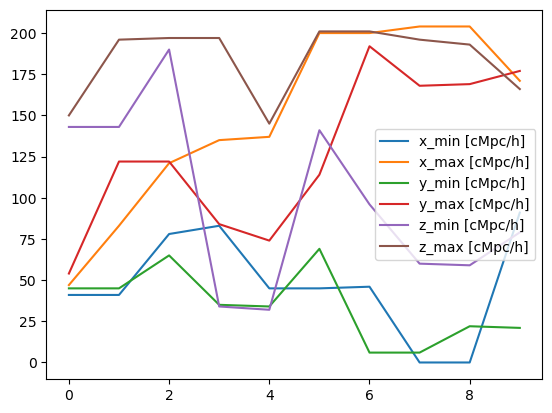

In [ ]:
ax = dm_df.plot(y=["x_min [cMpc/h]", "x_max [cMpc/h]", "y_min [cMpc/h]", "y_max [cMpc/h]", "z_min [cMpc/h]", "z_max [cMpc/h]"], title='All points min,max distribution')
ax.set_xlabel('ID')
ax.set_ylabel('value [cMpc/h]')

In [ ]:
dm_df.to_csv('./snapshot9_PointInfo.txt', sep = '\t', index=False)

In [ ]:
from tabulate import tabulate

# tabulate 패키지를 사용하여 테이블 형식으로 변환
table = tabulate(dm_df.values, headers=dm_df.columns, tablefmt='plain', )

# 텍스트 파일로 저장
with open('./snapshot9_PointInfo_aligned.txt', 'w') as f:
    f.write(table)